<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/ClassDemos/FDSfE_kmeans_24Oct23_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-1-94c4aa801e77>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Get Kaggle dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!chmod 600 /content/drive/MyDrive/Kaggle/kaggle.json

import json
envs = json.load(open("/content/drive/MyDrive/Kaggle/kaggle.json", "r"))

import os
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           9846        224  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          39140       1123  1.0              
willianoliveiragibin/healthcare-insurance                   Healthcare Insurance                               16KB  2023-10-12 20:24:09            697         22  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Datase

In [ ]:
!kaggle datasets download -d camnugent/california-housing-prices -p /content/drive/MyDrive/FDSfE_F2023

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/drive/MyDrive/FDSfE_F2023/california-housing-prices.zip -d /content/drive/MyDrive/FDSfE_F2023

Archive:  /content/drive/MyDrive/FDSfE_F2023/california-housing-prices.zip
caution: filename not matched:  -o


# Read dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FDSfE_F2023/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Select subset of data and scale it

In [ ]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X[X.columns] = scaler.transform(X)
X.describe()

,median_income,latitude,longitude
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,-6.422871e-01,5.389137e-01
75%,4.593063e-01,9.729566e-01,7.784964e-01
max,5.858286e+00,2.958068e+00,2.625280e+00


# Cluster the data with kmeans

In [ ]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_income,latitude,longitude,Cluster
0,2.344766,1.052548,-1.327835,3
1,2.332238,1.043185,-1.322844,3
2,1.782699,1.038503,-1.332827,3
3,0.932968,1.038503,-1.337818,3
4,-0.012881,1.038503,-1.337818,2


# Visualize the clusters locations

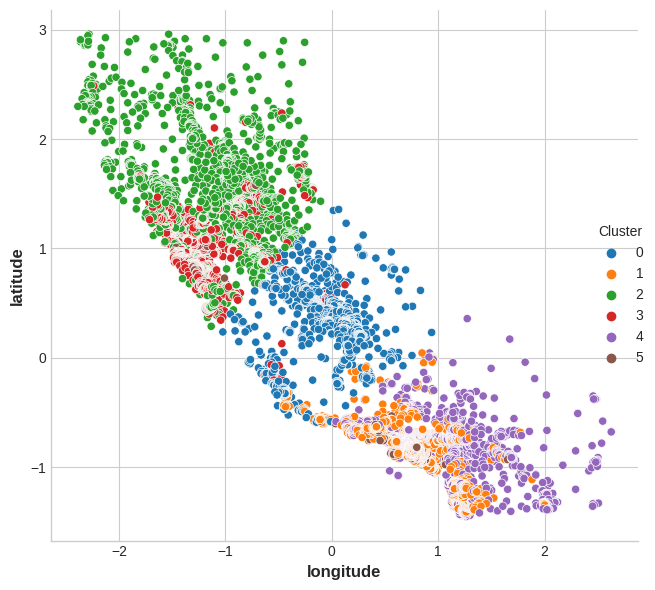

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
)

# Visualize the cluster values

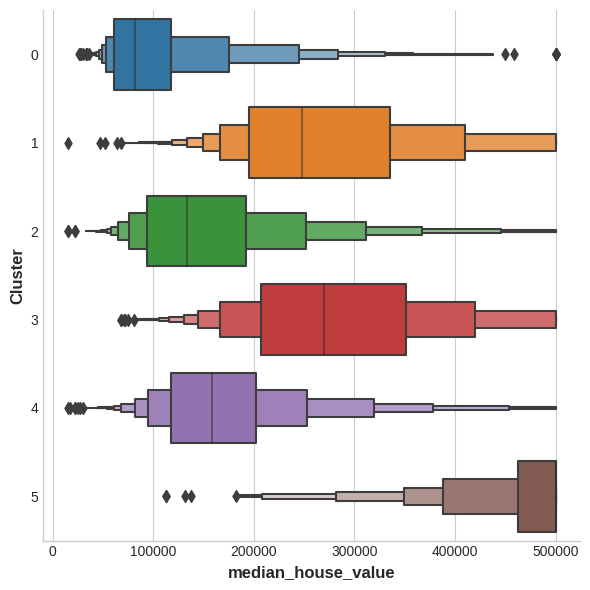

In [ ]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);